# Multiple Bar Charts


In [6]:
import pandas as pd
raw_data = {
    'sales_person': ['Vihan', 'Aric', 'Dilini', 'Saman', 'Anagi'],
    'Jan_sales' : [4,24,31,2,3],
    'Feb_sales' : [5,78,94,80,74],
    'March_sales' : [45,12,35,62,4]
}
df = pd.DataFrame(raw_data)

In [8]:
print(df)

   Feb_sales  Jan_sales  March_sales sales_person
0          5          4           45        Vihan
1         78         24           12         Aric
2         94         31           35       Dilini
3         80          2           62        Saman
4         74          3            4        Anagi


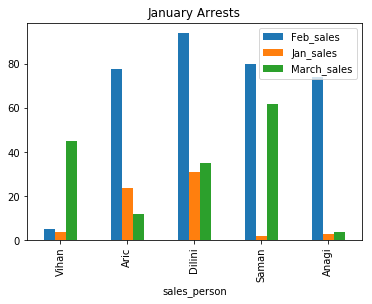

In [12]:
import matplotlib.pyplot as plt
% matplotlib inline
sales_plot = df.plot(kind="bar", x = df["sales_person"], title = "January Arrests", legend = True)
fig = sales_plot.get_figure()
fig.savefig('sales.png')

# Probability Distributions

In [14]:
import numpy as np
df_hist = pd.DataFrame({'a': np.random.randn(1000)})

In [15]:
df_hist.head()

,a
0,0.662100
1,-0.475283
2,-0.389612
3,-1.127037
4,-0.430537


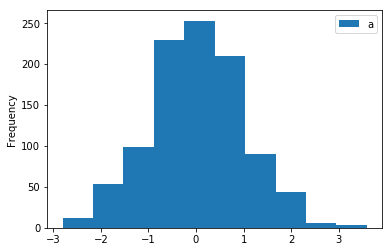

In [16]:
df_hist.plot.hist()

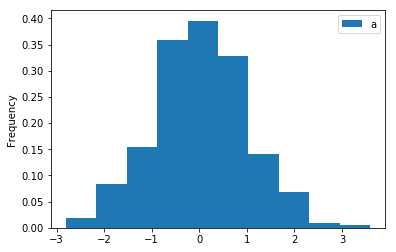

In [17]:
df_hist.plot(kind='hist', normed = True)

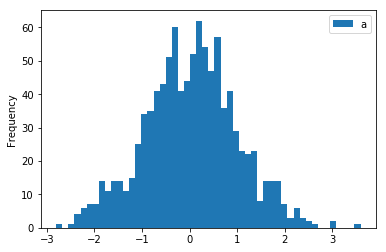

In [18]:
df_hist.plot(kind='hist', bins = 50)

In [25]:
df_hist2 = pd.DataFrame({
    'a' : np.random.randn(1000)+3,
    'b' : np.random.randn(1000)
    
})

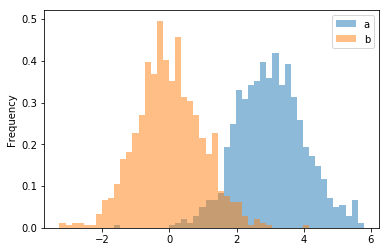

In [26]:
df_hist2.plot.hist(normed = True, bins = 50, alpha = 0.5)

In [27]:
df_hist2 = pd.DataFrame({
    'a' : np.random.randn(1000)+3,
    'b' : np.random.exponential(1,1000)
    
})

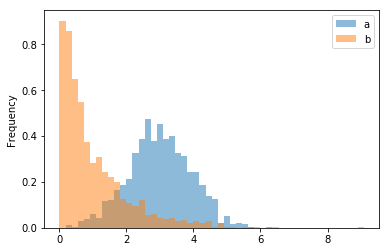

In [28]:
df_hist2.plot.hist(normed = True, bins = 50, alpha = 0.5)

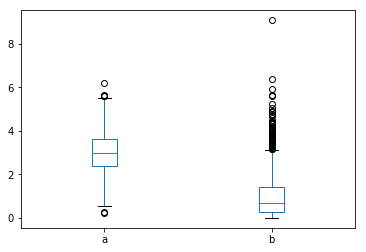

In [29]:
df_hist2.plot.box()

# Regression

In [30]:
import numpy as np
import pandas as pd
from sklearn import datasets
import statsmodels.api as sm
import math
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [32]:
data = datasets.load_boston()
df = pd.DataFrame(
    data.data,
    columns = data.feature_names
)

In [34]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [35]:
data.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [36]:
data.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [40]:
df['MEDV'] = data.target
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.2


In [42]:
model = sm.OLS(df.MEDV, sm.add_constant(df.RM))
p = model.fit().params


In [43]:
p

const   -34.670621
RM        9.102109
dtype: float64

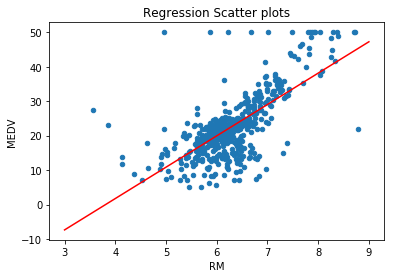

In [46]:
ax = df.plot(x = 'RM', y = 'MEDV', kind = 'scatter')
ax.set_title("Regression Scatter plots")
rm_min = math.floor(min(df.RM))
rm_max = math.ceil(max(df.RM))
x = range(rm_min, rm_max+1)
matplotlib_plot = ax.plot(x, p.const + p.RM * x, color = 'red')

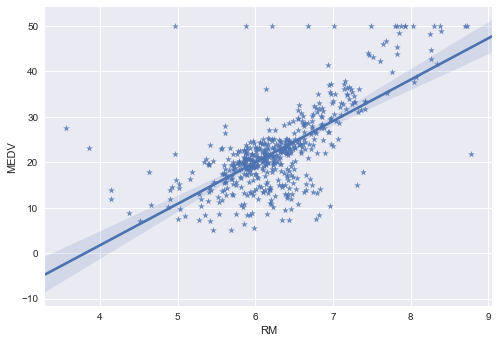

In [47]:
import seaborn as sns
sns.set(color_codes = True)
ax1 = sns.regplot(x = df.RM, y = df.MEDV, marker ='*')

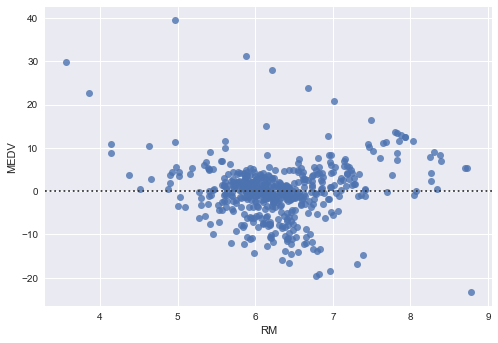

In [48]:
ax1 = sns.residplot(x=df.RM, y = df.MEDV)

In [49]:
df["AGE_CAT"] = ['young' if i<45 else 'old' for i in df.AGE]

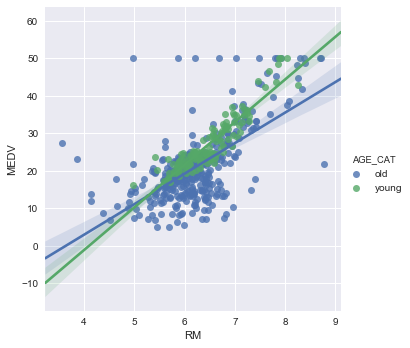

In [50]:
ax3 = sns.lmplot(x = 'RM', y = 'MEDV', hue = 'AGE_CAT', data = df)

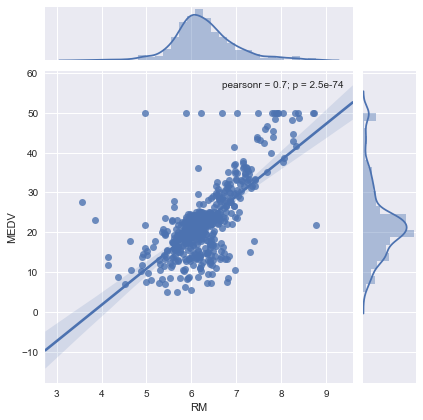

In [52]:
ax4 = sns.jointplot(x='RM', y = 'MEDV', data = df, kind = "reg")

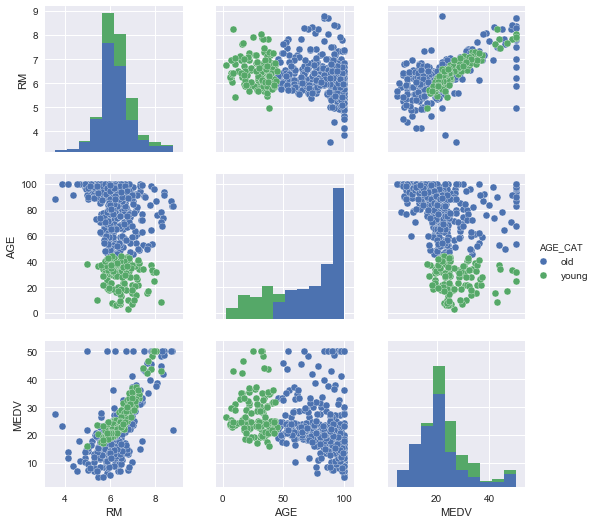

In [53]:
sns.pairplot(df, vars = ['RM', 'AGE', 'MEDV'], hue = "AGE_CAT")

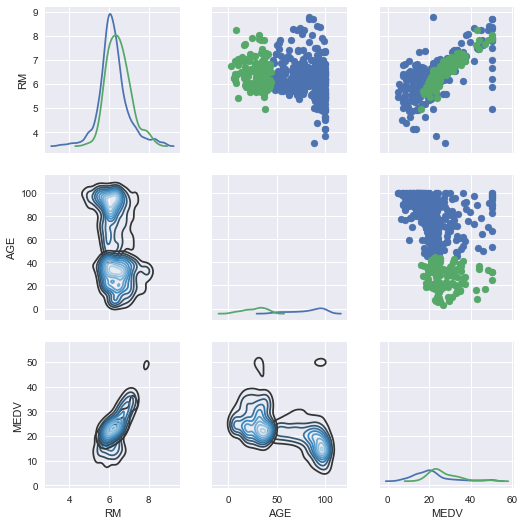

In [57]:
g = sns.PairGrid(df, vars =['RM', 'AGE', 'MEDV'], hue = "AGE_CAT")
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot)

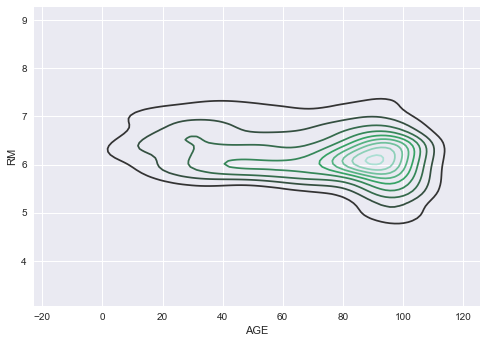

In [61]:
ax = sns.kdeplot(df.AGE, df.RM, Shade = False)

# Heat Map

In [68]:
flights = sns.load_dataset("flights")


URLError: <urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>

In [69]:
from IPython.html.widgets import *

C:\ProgramData\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [75]:
speed = widgets.RadioButtons(
    options = ["fast","medium", 'slow'],
    description = 'How speed are you?'
)
speed

In [76]:
speed.value

'medium'